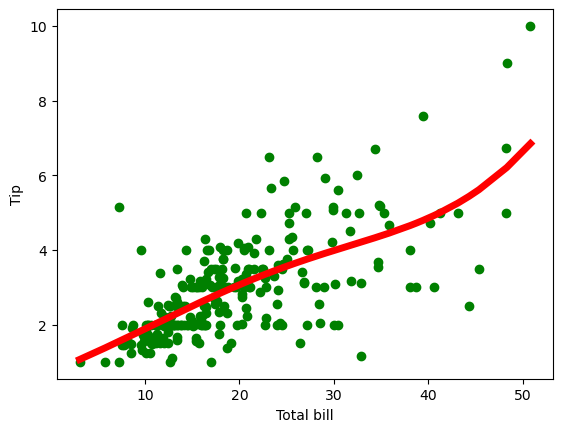

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (xmat.T * (wei * xmat)).I * (xmat.T * (wei * ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred

def graphPlot(X, ypred):
    sortindex = X[:, 1].argsort(0)
    xsort = X[sortindex][:, 0]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(bill, tip, color='green')
    ax.plot(xsort[:, 1], ypred[sortindex], color='red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show('lwr_plot.png')
    plt.close()

# Load data points
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))
ypred = localWeightRegression(X, mtip, 9)
graphPlot(X, ypred)

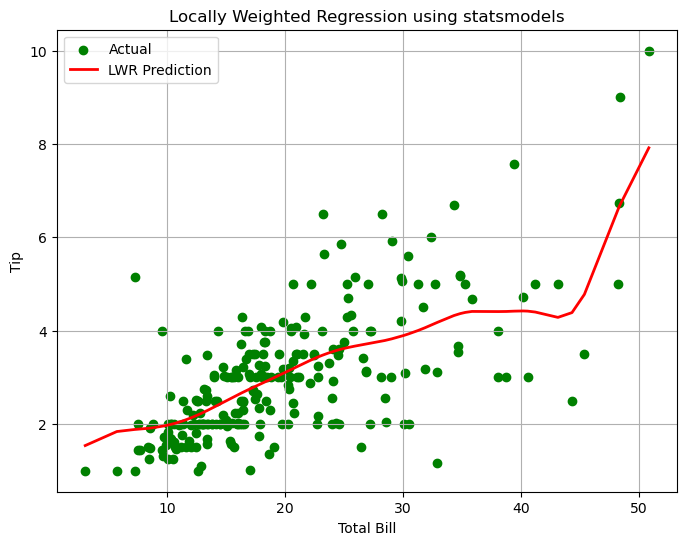

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg

# Load data
data = pd.read_csv('tips.csv')
bill = data['total_bill'].values
tip = data['tip'].values

# Reshape for KernelReg
X = bill.reshape(-1, 1)
y = tip

# KernelReg: 'c' = continuous regressor, reg_type='lc' = local constant (or 'll' for local linear)
model = KernelReg(endog=y, exog=X, var_type='c', reg_type='lc')

# Predict
ypred, _ = model.fit(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(bill, tip, color='green', label='Actual')
sorted_idx = np.argsort(bill)
plt.plot(bill[sorted_idx], ypred[sorted_idx], color='red', linewidth=2, label='LWR Prediction')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Locally Weighted Regression using statsmodels')
plt.legend()
plt.grid(True)
plt.show()
